# Tarefa 01: Regressão Linear

## Introdução

<b>Disciplina: </b> Tópicos especiais de Física I.

<b>Professor: </b> Saulo D. S. Reis (Departamento de Física -- UFC).

Neste exercício, você irá implementar uma regressão linear e começar a compreender como trabalhar com seus dados.

Toda a informação que você precisa para resolver essa tarefa está contida neste notebook, e todo o código que você irá implementar será escrito também neste notebook.

Esta tarefa foram adaptadas das tarefas originais presentes no exelente curso introdutório de Machine Learning do Prof. Andrew Ng, presente no Coursera que podem ser encontrados nesse [link](https://www.coursera.org/learn/machine-learning).

In [2]:
#!pip install numpy
#!pip install matplotlib
#!pip install scikit-learn

In [3]:
# Usado para manipular os diretórios do sistema operacional
import os

# Usada para operações numéricas e com vetores em python
import numpy as np

# Usada para plots
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # necessária para figuras 3D

# plote as figuras dentro deste jupyter notebook
%matplotlib inline

# Importando a implementação do Scikit-learn para a regressão linear
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

## Avaliação

Após completar essa tarefa, se certifique de submetê-la pelo sigga dentro do prazo.

A distribuição de pontos será feita de acordo com a tabela abaixo:

**Tarefas**

| Seção | Parte                                           |Função                     | Pontos 
|---------|:-                                             |:-                                     | :-:    
| 1       | [Exercício de Aquecimento](#section1)                  | [`exercicioDeAquecimento`](#warmUpExercise)    |  5    
| 2       | [Cálculo do custo](#section2)     | [`computeCost`](#computeCost)         |  20    
| 3       | [Gradiente descendente](#section3) | [`gradientDescent`](#gradientDescent) |  25
| 4       | [Normalização de features](#section4)                  | [`featureNormalize`](#warmUpExercise)    |  5    
| 5       | [Função custo com várias variáveis](#section5)     | [`computeCostMulti`](#computeCost)         |  15    
| 6       | [Gradiente descendente com várias variáveis](#section6) | [`gradientDescentMulti`](#gradientDescent) |  20    
| 7       | [Equações normais](#section7)                 |[`normalEqn`](normalEqn) | 10
|   Total de pontos    | $~$                                     |  $~$  | 100    


## Debugging

Alguma coisas para se ter em mente ao longo dessa tarefa:

- Em Python, os índices de um array começam de zero, não um. 

- Há diferenças importantes entre arrays usuais de Python (`list` ou `tuple`) e arrays do  `numpy`. Você deve utilizar arrays do `numpy` em todas suas implementações. Operações com vectores/matrizes funcionam apenas com arrays do `numpy`. Por exemplo, as `list` nativas do Python não suportam operações vetorizadas (com elas você precisa utilizar loops tradicionais).

- Se você verificou muitos erros em uma execução do seu código, verifique suas operações com matrizes e garanta que você está utilizando matrizes com dimensões adequadas. Imprimir as dimensões de seus arrays de `numpy` utilizando a propriedade `shape` pode te ajudar a debugar sua implementação.

- Por definição, `numpy` interpreta operações matemáticas elemento-por-elemento. Se deseja multiplicar matrizes, precisará utilizar a função `dot` presente no `numpy`. Por exemplo, se `A` e `B` são duas matrizes do `numpy`, então a operação AB é escrita na forma `np.dot(A, B)`.

<a id="section1"></a>
## 1 Python puro e simples, além de uma função do `numpy` 

Nesta primeira parte da tarefa, você irá praticar um pouco da sintaxe do Python e `numpy`. Na próxima célula, você encontrará um rascunho de uma função em `python`. Modifique ela para que ela retorne uma matriz identidade 5 x 5 conpletando-a com o seguinte código:

```python
A = np.eye(5)
```
<a id="warmUpExercise"></a>

In [4]:
def exercicioDeAquecimento():
    """
    Exemplo de uma função em Python.
    
    Saída
    -------
    A : tipo_array
        Matriz identidade 5x5.
        
    """
    
    A = np.eye(5)
    
    return A

A célula anterior, define a função `exercicioDeAquecimento`. Agora podemos rodar ela executando-a na próxima célula. Você deve encontrar uma saída igual ao que segue:

```python
array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])
```

## 2 Regressão Linear unidimensional

Agora, você irá implementar uma regressão linear de uma variável para prever os possíveis lucros de um food-truck. Suponha que você seja possua uma franquia de restaurantes e esteja considerando diferentes cidades para abrir um novo ponto de seu negócio. A cadeia já possui food trucks em várias cidades e você possui dados dos lucros dos caminhões e da população destas cidades. Você planeja utilizar esses dados para decidir melhor em qual cidade você irá expandir seus negócios.

O arquivo `Data/tar1data1.txt` contém um conjunto de dados para nossa regressão linear. A primeira coluna é a população de uma cidade (em 10.000 habitantes) e a segunda coluna é o lucro de um food truck nesta cidade (em R$10.000). Um valor negativo no lucro indica um prejuízo.

Abaixo, você encontrará o código para carregar este dado. O conjunto de dados será carregado nas variáveis `X` e `y`:

In [5]:
# Lendo arquivos separados por vírgulas
data = np.loadtxt(os.path.join('Data', 'tar1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size  # número de amostras de treino

### 2.1 Visualizando os dados

Antes de começar qualquer trabalho, é sempre útil entender seus dados visualizando-os. Para esse conjunto de dados, você pode utilizar um _scatter_ plot de seus dados, visto que há apenas duas propriedades para visualizar (lucro e população). Muitos problemas que você abordará serão problemas multi-dimensionais que não podem ser visualizados em figuras 2D. Há diversas bibliotecas para vizualização de dados em python, verifique esse [blog](https://blog.modeanalytics.com/python-data-visualization-libraries/) para um bom resumo das mais populares.

Nós usaremos exclusivamente o `matplotlib` para todas as nossas visualizações. O `matplotlib` é uma das bibliotecas de visualização científicas mais populares em ``pyhton`` e possui uma extensa lista de ferramentas e funcões. O `pyplot` é um módulo dentro do `matplotlib` que permite uma iterface simplificada das funções mais simples do `matplotlib`.

<div class="alert alert-block alert-warning">
Você deve ter notado que importamos o `pyplot` no começo da tarefa utilizando o comando `from matplotlib import pyplot`. Isso é incomum, usualmente, você encontrará o comando `import matplotlib.pyplot as plt`. Portanto, fique atento a essa diferença.
</div>

Na célula seguinte, sua tarefa é completar a função `plotData` modificando a função com o seguinte código:

```python
    pyplot.plot(x, y, 'ro', ms=7.5, mec='k')
    pyplot.ylabel('Lucro em R$10,000')
    pyplot.xlabel('População em 10,000 hab.')
```

In [6]:
def plotData(x, y):
    """
    Visualização dos pontos de dado x e y em uma nova figura. Apresenta
    o dado e com seus eixos com os rótulos de População e Lucro.
    
    Parâmetros
    ----------
    x : tipo_array
        Dados para o eixo-x.

    y : tipo_array
        Dados para o eixo-y. Note que x e y devem possuir o mesmo número de
        elementos.
    
    Instruções
    ----------
    Visualiza os dados utilizando a função "plot". Atribui os rótulos dos
    eixos usando as funções "xlabel" e "ylabel". Assume que os dados de 
    população e lucro foram passados como os argumentos x e y da função,
    respectivamente.
    
    Dica
    ----
    Voc6e pode usar a opção 'ro' para que os símbolos sejam círculos 
    vermelhos. Além disso, você pode modificar o tamanho dos símbolos 
    utilizando a propriedade `ms` e a cor de sua borda com a propriedade
    `mec`.
    """
    
    fig = pyplot.figure()  # abra uma nova figura
    
    pyplot.plot(x, y, 'ro', ms=7.5, mec='k')
    pyplot.ylabel('Lucro em R$10,000')
    pyplot.xlabel('População em 10,000 hab.')

Agora, execute a função na próxima célular com os dados armazenados nos arrays X e y e visualize os dados. O resultado deve ser igual ao da seguinte figura:

![](Figures/dataset1.png)

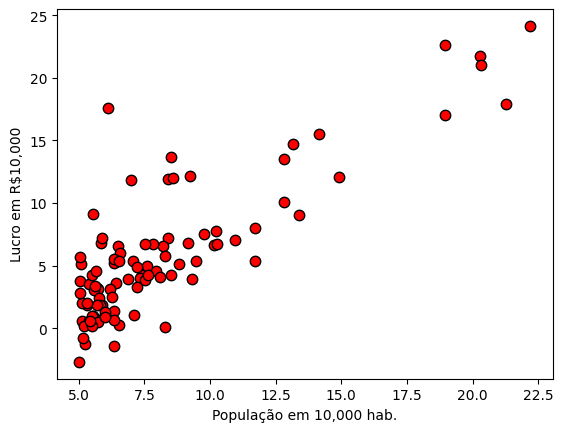

In [7]:
plotData(X, y)

<a id="section2"></a>
### 2.2 Gradiente Descendente


Nesta parte da tarefa, você ajustará os parâmetros $\theta$ de uma regressão linear ao nosso conjunto de dados utilizando o algoritmo do Gradiente Descendente.

#### 2.2.1 Update da Equações

O objetivo da regressão linear é minimizar a função custo

$$ J(\Theta) = \frac{1}{2m} \sum_{i=1}^m \left[ h\left(\Theta, x^{(i)}\right) - y^{(i)}\right]^2,$$

onde a função hipótese $h\left(\Theta, x^{(i)}\right)$ é dada pelo modelo linear
$$ h\left(\Theta, x^{(i)}\right) = \Theta^Tx = \theta_0 + \theta_1 x_1.$$

Lembre-se que os parâmetros do nosso modelo são os valores $\theta_0$ e $\theta_1$. Estes são os valores ajustados ao minimizarmos a função custo $J(\theta)$. Uma forma de fazê-lo, é utilizando o algoritmo do gradiante descendente <i>batch</i>, ou seja utilizando todo o conjunto de treinamento. No gradiante descendente batch, em cada iteração, você realiza o update 

$$ \theta_j = \theta_j - \eta \frac{1}{m} \sum_{i=1}^m \left[ h\left(\Theta, x^{(i)}\right) - y^{(i)}\right]x_j^{(i)} \qquad \text{update simultâneo de } \theta_j \text{ para todos of valores de } j.$$

A cada iteração do gradiente descendente, seus parâmetros tornam-se mais próximos aos valores ótimos referentes ao menor custo $J(\theta)$.

<div class="alert alert-block alert-warning">
**Nota de implementação:** Nós alocamos cada amostra como uma linha da matrix $X$ em um array do `numpy`. Para conseguirmos uma implementação vetorizada, levando em consideração o termo de interceptação $\theta_0$, adicionamos uma coluna adicional a $X$ com valores iguais a 1. Isso nos permite tratar $\theta_0$ simplesmente como um coeficiente de mais um 'feature' $x_0 = 1$.
</div>


#### 2.2.2 Implementação

Já preparamos os dados para a regressão linear. Na próxima célula, adicionamos outra dimensão a nosso conjunto de dados para acomodar o termo de interceptação $\theta_0$. <b>Não execute essa célula mais de uma vez</b>, pois isso adicionará novas colunas a $X$, causando problemas com a dimensionalidade das matrizes $X$ e $\Theta$.

In [8]:
# Adiciona uma coluna de 1's ao array X.
# A função do numpy stack une arrays ao longo de um dado eixo.
# O primeiro eixo (eixo=0) se refere às linhas (amostras de treino) 
# o segundo eixo (eixo=1) se refere às colunas (features).
X = np.stack([np.ones(m), X], axis=1)
print(X)

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

<a id="section2"></a>
#### 2.2.3 Cálculo do custo $J(\Theta)$

É útil acompanhar o a convergência do gradiente descendente calculando a função custo a cada passo. Nesta seção, você implementará uma função para o cálculo do custo $J(\Theta)$ de modo que você possa verificar a convergência de seu gradiente descendente.

Sua próxima tarefa é completar o código da função `computCost`, a qual calcula $J(\Theta)$. A medida que você realiza a tarefa, lembre-se que as variáveis $X$ e $y$ não são grandezas escalares. $X$ é uma matrix cujas linhas representam as amostras de treino e $y$ é um vetor onde cada elemento representa o valor de uma dada linha de $X$.
<a id="computeCost"></a>

In [9]:
def computeCost(X, y, theta):
    """
    Calcula o custo para uma regressão linear. Calcula o custo utilizando 
    theta como um parâmetro para que a regressão linear se ajuste à X e y
    
    Parâmetros
    ----------
    X : tipo_array
        Conjunto de dados de entrada na forma (m x n+1), onde m é o número
        de amostras e n é o número de features. Aqui, assumimos um vetor de
        1's anexo à matriz de features de modo que temos n+1 colunas.
    
    y : tipo_array
        Os valores da função para cada amostra. Este é um vetor na forma (m, ).
    
    theta : tipo_array
        Osparâmetros para a regressão linear. Um vetor na forma (n+1, ).
    
    Saída
    -----
    J : float
        Valor do custa da regressão.
    
    Instruções
    ----------
    Calcule o custo de um theta particular.
    Atribua J à função custo.
    """
    
    # inicialize valores úteis
    m = y.size  # número de amostras de treino
    return 0.5/m*np.dot((np.dot(X,theta)-y),(np.dot(X,theta)-y))

Uma vez que você completou a função, na próxima célula você executará `computeCost` duas vezes utilizando duas inicializações diferentes de $\theta$. O valor da função custo em cada caso será exibido em seguida.

In [10]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Com theta = [0, 0] \nCusto calculado = %.2f' % J)
print('Resposta esperada (valor aproximado) 32.07\n')

# Teste adicional da função custo
J = computeCost(X, y, theta=np.array([-1, 2]))
print('Com theta = [-1, 2]\nCusto calculado = %.2f' % J)
print('Resposta esperada (valor aproximado) 54.24')

Com theta = [0, 0] 
Custo calculado = 32.07
Resposta esperada (valor aproximado) 32.07

Com theta = [-1, 2]
Custo calculado = 54.24
Resposta esperada (valor aproximado) 54.24


<a id="section3"></a>
#### 2.2.4 Gradiente descendente

Agora, você irá completar um gradiente descendente.

A estrutura de loop utilizada para monitorar a convergência do algoritmo já está implementada, e você apenas precisa fornecer os updates de $\Theta$ em cada iteração.

A medida que você programa, procure garantir que você compreende o que você está tentando otimizar e o que está sendo atualizado a cada iteração. Lembre-se que a função custo $J(\Theta)$ é parametrizada pelo vetor $\Theta$, e não por $X$ e $y$. Ou seja, minimize a função $J(\Theta)$ modificando o valor de $\Theta$, e não de $X$ e $y$. [Consulte as equações deste notebook](#section2). Um maneira usual de verificar que o gradiente descendente está funcionando, é monitorar se o valor de $J(\Theta)$ está diminuindo a cada iteração.

O código para a função `gradientDescent` chama a função `computeCost` a cada iteração e salva o custo em uma lista do `python`. Assumindo que você tenha implementado o gradiente descendente e a `computeCost` corretamente, seu valor de $J(\Theta)$ nunca deve aumentar, e deve convergir a um calor constante ao final da execução.

<div class="alert alert-box alert-warning">
**Vetores e matrizes em `numpy`** - Notas de implementação importantes

Um vetor em `numpy` é um array uni-dimensional, por exemplo `np.array([1, 2, 3])` é um vetor. Uma matriz em `numpy` é um array bi-dimensional, por exemplo `np.array([[1, 2, 3], [4, 5, 6]])`. Contudo, o objeto `np.array([[1, 2, 3]])` ainda é uma matrix de duas dimensões, mesmo tendo a forma de 1x3, o que parece um vetor.

Após essa consideração, a função `np.dot`, a qual usaremos para todas as multiplicações de matriz/vetor, possui as seguintes propriedades:
- Quando executada em vetores, ela sempre opera o produto interno (produto escalar) entre os vetores. Se `x=np.array([1, 2, 3])`, então `np.dot(x, x)` é um escalar.
- Para multiplicações matriz-vetor, se $X$ é uma matrix $m\times n$ e $y$ é um vetor com $m$ elementos, então a operação `np.dot(y, X)` considera $y$ como um vetor $1 \times m$. Em contrapartida, se $y$ é um vetor de comprimento $n$, a operação `np.dot(X, y)` considera $y$ como um vetor $n \times 1$.
- Um vetor pode ser "promovido"a uma matriz utilizando-se `y[None]` ou `[y[np.newaxis]`. Ou seja, se `y = np.array([1, 2, 3])` é um vetor com 3 elementos, então `y[None, :]` é uma matrix de dimensão $1 \times 3$. Podemos utilizar `y[:, None]` para obter a forma $3 \times 1$.
<div>
<a id="gradientDescent"></a>

In [11]:
def gradientDescent(X, y, theta, eta, num_iters):
    """
    Executa o gradiente descendente para aprender `theta`. Atualiza theta por meios de 
    `num_iters` passos de gradiente com uma taxa de aprendizagem `eta`.
    
    Parâmetros
    ----------
    X : tipo_array
        Dados de entrada na forma (m x n+1).
    
    y : tipo_array
        Os valores da função para cada amostra. Este é um vetor na forma (m, ).
    
    theta : tipo_array
        Valores iniciais para os parâmetros da regressão linear. 
        Um vetor na forma (n+1, ).
    
    eta : tipo float
        A taxa de aprendizagem.
    
    num_iters : tipo int
        Número de iterações para o gradiente descendente. 
    
    Saída
    -----
    theta : tipo_array
        O parâmetros aprendidos da regressão linear. Um vetor na forma (n+1, ).
    
    J_history : tipo_list
        Uma lista do python para os valores da função custo após cada iteração.
    
    Instruções
    ----------
    Executa o gradiente descendente sobre o vetor de parâmetros theta em um dado
    número de iterações.

    Para debugar o código, pode ser útil imprimir os valores da função custo e 
    do gradiente descendente aqui.
    """
    # Inicialize parâmetros úteis
    m = y.shape[0]  # número de amostras de treino
    
    # faça uma cópia de theta, evitando modificar seu valor inicial, uma vez que
    # arrays do numpy são passados por referência às funções
    theta = theta.copy()
    
    J_history = [] # Use uma lista do python para guardar o valor do custo a cada iteração
    
    for i in range(num_iters):
        gradient = np.dot((np.dot(X,theta)-y),X) # soma já implicita na operação com numpy
        theta = theta - (eta/m)*gradient
        J_history.append(computeCost(X, y, theta)) # salve J a cada iteração
    
    return theta, J_history

Após terminar sua implementação, chame a função `gradientDescent` e imprima os valores finais de $\Theta$. Na próxima célula, $\Theta$ é inicializado na origem ($\Theta = (0,0)$) e a taxa de aprendizagem é fixada no valor de 0.01. Execute a próxima célula e verifique seu código.

In [12]:
# inicialize os parâmetros de ajuste theta na origem
theta = np.zeros(2)

# determine o valor da taxa de aprendizagem e o número de iterações
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print(': {:.4f}, {:.4f}'.format(*theta))
print('Resposta esperada (valor aproximado): [-3.6303, 1.1664]')

: -3.6303, 1.1664
Resposta esperada (valor aproximado): [-3.6303, 1.1664]


Lembre-se de verificar a convergência da função custo para cada iteração. Execute a próxima célula para visualizar o valor da função custo a cada iteração. O resultado deve ser igual ao da seguinte figura:

![](Figures/cost_iteration.png)

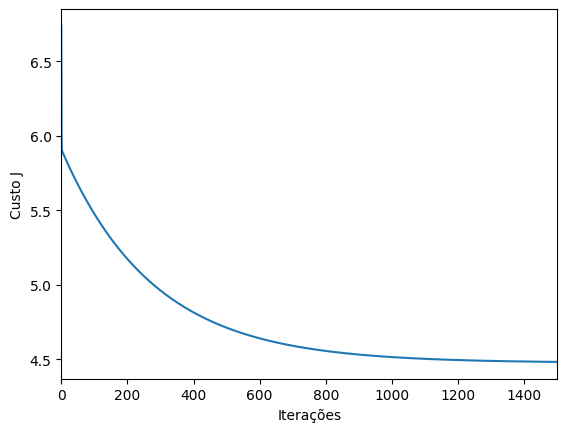

In [13]:
pyplot.plot(J_history)
pyplot.ylabel('Custo J')
pyplot.xlabel('Iterações');
pyplot.xlim((0, iterations));

Usaremos agora os parâmetros $\Theta$ encontrados pela função `gradientDescent` para visualizar o ajuste linear. O resultado deve ser igual ao da seguinte figura:

![](Figures/regression_result.png)

[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]


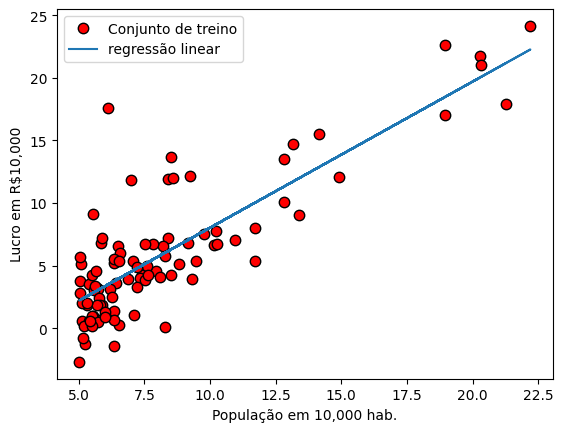

In [14]:
#print(X)
print(X[:,1])
# visualize o ajuste linear
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Conjunto de treino', 'regressão linear']);

Os seus valores finais de $\Theta$ serão agora utilizados para fazer previsões para o lucro de áreas urbanas com 35.000 e 70.000 pessoas.

<div class="alert alert-block alert-success">
Note a forma como as linhas de código da próxima célula usam multiplicação de matrizes, ao invés de somas explícitas ou loops, para calcular as previsões. Este é um exemplo de vetorização em `numpy`.
</div>

<div class="alert alert-block alert-success">
Note que o primeiro argumento da função `dot` é uma lista de python. `numpy` converte internamente listas de python **válidas** para arrays do numpy quando fornecidas explicitamente nos argumentos de suas funções.
</div>


In [15]:
# Preveja os lucros para populações de 35.000 and 70.000 pessoas
predict1 = np.dot([1, 3.5], theta)
print('Para uma população = 35.000, prevemos um lucro de {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('Para uma população = 70,000, prevemos um lucro de {:.2f}\n'.format(predict2*10000))

Para uma população = 35.000, prevemos um lucro de 4519.77

Para uma população = 70,000, prevemos um lucro de 45342.45



## Comparando com o Scikit-learn (opcional):

Agora que você implementou o algoritmo de regressão linear com sucesso, é interessante que possamos compará-lo com o resultado obtido pelo Scikit-learn.

Na próxima célula, você encontrará a implementação da regressão linear utilizando o Scikit-learn.

In [16]:
# Escolha o modelo
skl_reg = LinearRegression();

# E realize a regressão
skl_reg.fit(X[:,1].reshape(-1,1), y.ravel());

Pronto! A regressão linear executada pelo Scikit-learn está pronta. Agora, você pode comparar as soluções da sua implementação com os resultados do Scikit-learn executando a próxima célula.

Sua previsão para os valores de theta: -3.6303, 1.1664
Valor da função custo para sua previsão:  4.483388256587725 

Previsão obtida com o Scikit-learn:  -3.895780878311852 , 1.1930336441895937
Valor da função custo obtido com o Scikit-learn:  [4.47697138] 



<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


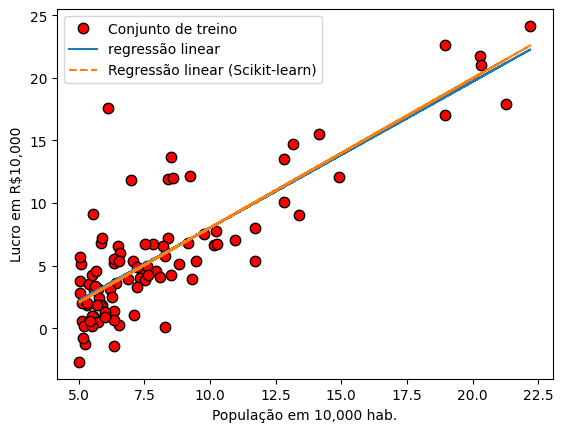

In [17]:
# Modelo obtido com a sua implementação
print('Sua previsão para os valores de theta: {:.4f}, {:.4f}'\
      .format(*theta));
print('Valor da função custo para sua previsão: ',\
      computeCost(X, y, theta),'\n');

# Modelo obtido o Scikit-learn
print('Previsão obtida com o Scikit-learn: ',\
      skl_reg.intercept_,',',*skl_reg.coef_);
print('Valor da função custo obtido com o Scikit-learn: ',\
      computeCost(X, y, [skl_reg.intercept_,skl_reg.coef_]),'\n');

# Compare a visualização dos dois modelos
plotData(X[:, 1], y);
pyplot.plot(X[:, 1], np.dot(X, theta), '-');
pyplot.plot(X[:, 1], skl_reg.intercept_+skl_reg.coef_*X[:, 1],'--');
pyplot.legend(['Conjunto de treino', 'regressão linear',\
               'Regressão linear (Scikit-learn)']);

### 2.4 Visualizando $J(\Theta)$


Para entendermos melhor a função custo $J(\Theta)$, você irá visualizá-la sobre um grid bi-dimensional de valores de $\theta_0$ and $\theta_1$. Você não precisará escrever nenhuma linha de código para essa parte, mas deverá procurar entender como código que está escrito na próxima célula gera as imagens.

Na próxima célula, o código está preparado para calcular $J(\Theta)$ sobre um grid de valores usando a função `computeCost` que você escreveu. Então, esses valores serão utilizados para produzir a superfície de $J(\Theta)$ e suas curvas de nível usando o as funções `plot_surface` e `contourf`. As imagens deve ser semelhantes às seguintes figuras:

![](Figures/cost_function.png)

O propósito dessas figuras é te mostrar como $J(\Theta)$ varia com mudanças em $\theta_0$ e $\theta_1$. A função $J(\Theta)$ de uma distância quadrática média é uma função convexa e possui um mínimo global, visualizado mais facilmente com curvas de nível. O mínimo é o ponto ótimo para $\theta_0$ e $\theta_1$, e cada iteração do gradiente descendente movimenta seu modelo para um ponto mais próximo desse ponto.


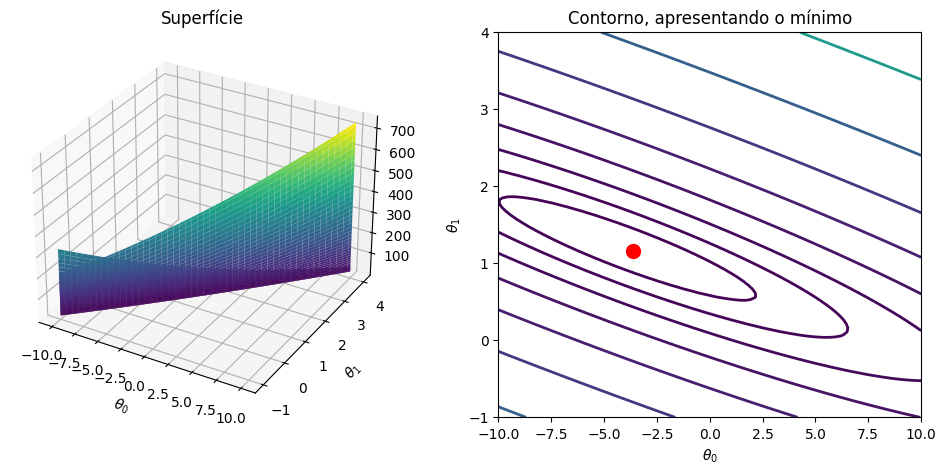

In [18]:
# grid sobre o qual calcularemos J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicialize J_vals como uma matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Calcule J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Tendo em vista a forma como o mesh é utilizado pela função plot_surface,
# precisamos transpor J_vals antes de chamá-la, ou então o resultado estará
# espelhado
J_vals = J_vals.T

# visualização de superfície
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel(r'$\theta_0$')
pyplot.ylabel(r'$\theta_1$')
pyplot.title('Superfície')

# curvas de nível
# Visualize J_vals como 15 contornos espaçados logaritimicamente entre 0.01 and 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis',\
               levels=np.logspace(-2, 3, 20))
pyplot.xlabel(r'$\theta_0$')
pyplot.ylabel(r'$\theta_1$')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, apresentando o mínimo')
pass

## 3 Regressão Linear com várias vaiáveis

Nesta parte da tarefa, você irá implementar uma regressão linear de várias variáveis com o objetivo de prever o preço de imóveis. Suponha que você queira vender sua casa e deseja estimar um bom valor de mercado. Uma boa forma de conseguir essa informação é coletar informação sobre imóveis vendidos recentemente e construir um modelo para o preço dos imóveis.

O arquivo `Data/tar1data2.txt` contém o conjunto de treino para o preço de casas em Portland, Oregon. A primeira coluna é a área construída da casa (em pés quadrados), a segunda coluna é o número de quartos do imóvel e a terceira coluna seu preço.

<a id="section5"></a>
### 3.1 Normalização de features (<i>feature scaling</i>)

Comece carregando e visualizando alguns valores do seu conjunto de dados. Ao olhar os valores do banco de dados, note que a área construída das casa é cerca de 1000 vezes o número de quartos. Quando features diferem por várias ordens de magnitude, realizar uma normalização dos features pode fazer com que o gradiente descendente convirja muito mais rápido.

In [19]:
# Carregue os dados
data = np.loadtxt(os.path.join('Data', 'tar1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

# imprima alguns valores do conjunto de dados
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.1f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
   210.4       3    399900
   160.0       3    329900
   240.0       3    369000
   141.6       2    232000
   300.0       4    539900
   198.5       4    299900
   153.4       3    314900
   142.7       3    198999
   138.0       3    212000
   149.4       3    242500


Sua tarefa agora é completar o código da função `featureNormalize`:
- subtraia o valor médio de cada feature do conjunto de dados;
- Após subtrair a média, escalone (divida) cada valor de feature por seu "desvio padrão".

O desvio padrão é uma forma de medir quanta variação há em cada feature (a maioria das amostras do conjunto de dados estarão dentro de ±2 "desvios padrões" da média); Esta é uma alternativa à escalonar os dados pelo intervalo dos valores de um feature (min-max). Você pode utilizar a função `std` do `numpy` para calcular o desvio padrão.

Por exemplo, a quantidade `X[:,0]` contém todos os valores $x_1$ de cada amostra (área construida) do seu conjunto de dados, de modo que `np.std(X[:,0])` calcula o desvio padrão da área contrída das amostras. <b>Atenção</b>, no momento que a função `featureNormalize` é chamada, a coluna de 1's corresondendo a $x_0 = 1$ ainda não foi adicionada a $X$.

Você fará a normalização com todos os features e seu código deve funcionar com conjunto de dados de todos os tamanhos (qualquer numero de features / amostras). Ou seja, você deve fazer uma implementação geral, que funcione para qualquer conjunto de dados e não apenas o conjunto de dados dessa tarefa. Lembre-se, cada coluna da matriz $X$ corresponde a um feature.

<div class="alert alert-block alert-warning">
**Nota de implementação:** Quando o <i>feature scaling</i> é realizado, é importante guardar  os valores dos parâmetros utilizados para a normalização - as médias e desvios padrões. Após o aprendizado dos parâmetros do modelo, queremos prever o preço de imóveis que ainda não foram vistos. Assim, dado um novo valor de $x$ (área construida e número de quartos), devemos normalizar $x$ usando a média e desvio padrão calculado anteriormente com o conjunto de treino.
</div>
<a id="featureNormalize"></a>

In [20]:
def  featureNormalize(X):
    """
    Normaliza os features em X. Esta função retorna um versão normalizada
    de X onde o valor médio de cada feature é zero e o desvio padrão é 1.
    Este é um excelente passo de pré-processamento quando estamos trabalhando
    com algoritmos de machine learning
    
    Parâmetros
    ----------
    X : tipo_array
        Conjunto de dados na forma (m x n).
    
    Saída
    -------
    X_norm : tipo_array
        Conjunto de dados normalizado na forma (m x n).
    
    Instruções
    ------------
    Primeiro, para cada dimensão, calcule o valor médio de cada feature
    e o subtraia do conjunto de dados, guardando seu valor na variável mu.
    Depois, calcule o desvio padrão de cada feature e divida cada feature
    por seu respectivo desvio padrão, guardando-o na variável sigma.
    
    Note que X é uma matriz onde cada coluna guarda os valores de um feature e 
    cada linha guarda os features de uma amostra. A normalização pode ser feita 
    para cada feature de forma separada.
    
    Dica
    ----
    Estude as funções 'np.mean' e 'np.std' do numpy.
    """
    # Você precisa retornar estas variáveis corretamente
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    print(mu,sigma)

    mu = np.mean(X,axis=0)
    sigma = np.std(X_norm,axis=0)
    X_norm = (X_norm-mu) / sigma

    return X_norm, mu, sigma

Execute a próxima célula para chamar e executar a função `featureNormalize`.

In [21]:
# chama featureNormalize no conjunto de dados carregado
X_norm, mu, sigma = featureNormalize(X)

print('Média calculada:', mu)
print('Desvio padrão calculado:', sigma)

[0. 0.] [0. 0.]
Média calculada: [200.06808511   3.17021277]
Desvio padrão calculado: [78.62026187  0.75284281]


Após testar a função `featureNormalize`, adicionamos os termos de interceptação $x_0$ a `X_norm`:

In [22]:
# Adiciona os termos de interceptação $x_0$ a X_norm
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

<a id="section6"></a>
### 3.2 Gradiente descendente

Anteriormente, você implementou o método do gradiente descendente para o problema da regressão linear em uma dimensão. A única diferença agora é que você possui um feature a mais na matriz $X$. A função hipótese e o update batch permanecem os mesmos.

Você deve completar as funções `computeCostMulti` e `gradientDescentMulti` para finalizar a implementação da função custo e do gradiente descendente para uma regressão linear de várias variáveis. Se o seu código anterior (regressão linear de uma variável) já suporta várias variáveis, você pode usá-lo aqui.

Garanta que seu código suporta qualquer número de features e está bem vetorizado. Você sempre pode usar a função `shape` do `numpy` para descobrir quantos features estão presentes no seu conjunto de dados.

<div class="alert alert-block alert-warning">
**Nota de implementação:** Para o caso de várias variáveis, a função custo pode ser escrita na seguinte forma vetorizada:

$$ J(\Theta) = \frac{1}{2m}(X\Theta - \vec{y})^T(X\Theta - \vec{y}),$$

onde 

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}.$$

A forma vetorizada é eficiente quando estamos trabalhando com ferramentas numéricas como o `numpy`. É didático verificar que ambas as formas são equivalentes.
</div>

<a id="computeCostMulti"></a>

In [23]:
def computeCostMulti(X, y, theta):
    """
    Calcula o valor da função custo para uma regressão linear de várias variáveis
    Calcula o custo utilizando theta como os parâmetros da regressão linear para o ajuste
    do conjunto de dados armazenados em x e y.
    
    Parâmetros
    ----------
    X : tipo_array
        conjunto de dados na forma (m x n+1).
    
    y : tipo array
        Um vetor na forma (m, ) para os valores de uma amostra particular do conjunto
        de dados.
    
    theta : tipo_array
        Parâmetros da regressão linear. Um vetor na forma (n+1, ).
    
    Saída
    -----
    J : tipo float
        Valor da função custo. 
    
    Instruções
    ----------
    Calcule o custo para um conjunto particular de theta. 
    """
    # Inicializa variáveis úteis.
    m = y.shape[0] # Número de amostras no conjunto de treino
    
    return 0.5/m*sum(np.square(np.dot(X,theta)-y))

In [24]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Realiza o método do gradiente descendente para aprender os parâmetros theta.
    Faz o update de theta em num_iters passos com a taxa de aprendizado alpha.
        
    Parâmetros
    ----------
    X : tipo_arra
        Conjunto de dados na forma (m x n+1).
    
    y : tipo_array
        Um vetor na forma (m, ) para os valores de uma amostra particular do conjunto
        de dados.    
    theta : tipo_array
        Parâmetros da regressão linear. Um vetor na forma (n+1, ).
    
    alpha : tipo float
        Taxa de aprendizado para o gradiente descendente. 
    
    num_iters : tipo int
        número de iterações do gradiente descendente. 
    
    Saída
    -----
    theta : tipo array
        Parâmetros da regressão linear aprendidos durante o gradiente descendente.
        Um vetor na forma (n+1, ).
    
    J_history : tipo list
        Uma lista do python para os valores da função custo após cada iteração.

    
    Instruções
    ----------
    Executa o gradiente descendente sobre o vetor de parâmetros theta em um dado
    número de iterações.

    Para debugar o código, pode ser útil imprimir os valores da função custo e 
    do gradiente descendente aqui.
    """
    # Inicializa variáveis úteis
    m = y.shape[0] # Número de amostras de treino
    
    # faça uma cópia de theta, evitando modificar seu valor inicial, uma vez que
    # arrays do numpy são passados por referência às funções
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        gradient = np.matmul((np.dot(X,theta)-y),X) # soma já implicita na operação com numpy
        theta = theta - (alpha/m)*gradient
        J_history.append(computeCost(X, y, theta)) # salve J a cada iteração
    
    return theta, J_history

#### 1.2.1 Escolhendo a taxa de aprendizado

Neste parte da tarefa, você testará diferentes taxas de aprendizado para nosso conjunto de dados e escolherá aquela que convirja mais rápido. Você pode escolher diferentes taxas de aprendizado modificando o código na próxima célula e modificando a parte do código que atribui seu valor.

Use sua implementação `gradientDescentMulti` e execute o gradiente descente por cerca de 50 iterações para a taxa de aprendizado escolhida. A função também retorna os valores $J(\Theta)$ a cada iteração.

Após a última iteração, visualize $J(\Theta)$ como função do número de iterações.

Se você escolher um valor de $\eta$ razoável, sua figura será similar à seguinte:

![](Figures/learning_rate_multi.png)

Se seu gráfico parece muito diferente do gráfico acima, especialmente se os valores de $J(\Theta)$ aumentam ou mesmo diverge, ajuste a taxa de aprendizado e tente novamente. Você pode experimentar valores de $\eta$ em uma escala logarítmica, com valores espaçados por até 3 vezes o valor anterior (ou seja, 0.3, 0.1, 0.03, 0.01, e assim por diante). Talvez você também queira modificar o número de iterações, caso isso ajude a verificar a forma geral da tendência  da curva.

<div class="alert alert-block alert-warning">
**Nota de implementação:** Se sua taxa de aprendizado é alta, $J(\Theta)$ pode divergir, resultando em valores que excedem a capacidade numérica do computador. Nessas situações, `numpy` retornará NaN (Not a Number), saída usualmente causada por operações não definidas que involvam −∞ e +∞.
</div>

<div class="alert alert-block alert-warning">
**Nota MATPLOTLIB:** Para comparar como diferentes taxas de aprendizado afetam a convergência do algoritmo, pode ser útil visualizar $J$ para diferentes valores de $\eta$ em uma mesma figura. Isso pode ser feito ao fazer de $\eta$ uma lista do python com os diferentes valores, executando um loop sobre esses valores e chamando a função plot a cada iteração desse loop. Não esqueça de distinguir cada curva com sua respectiva legenda.
</div>


Note as mudanças nas curvas de convergência de acordo com as variação da taxa de aprendizado. Com uma taxa de aprendizado pequena, você encontrará que o algoritmo demora muito para convergir ao valor ótimo. Em contrapartida, com uma taxa de aprendizado alta, o gradiente descendente talvez não convirja e sim divirja. Usando a melhor taxa de aprendizado, execute o script até a convergência do gradiente descendente e encontre os valores finais para $\Theta$. Depois, use esses valores de $\Theta$ e preveja o preço de uma casa com 165 metros quadrados e 3 quartos. Você usará esse valor depois para verificar sua implementação das equações normais. Não esqueça de normalizar os features!

theta calculado pelo gradiente descendente: [334302.06399328  99411.44947359   3267.01285407]
Preço previsto para uma casa de 165 m2 e 3 quartos (GD): $289221.547371


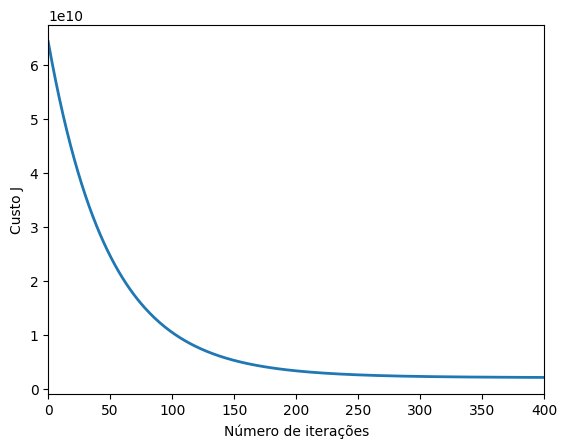

In [25]:
"""
Instruções
----------
Abaixo já está implementado um código inicial que executa o
gradiente descendente para uma taxa de aprendizado (eta)
particular.

Sua tarefa é, primeiramente, garantir que as funções `computeCostMulti`
e `gradientDescentMulti` estão funcionando e suportam problemas com
várias variáveis.

Após isto feito, execute o gradiente descendente com diferentes
valores de eta e verifique qual produz o melhor resultado.

Finalmente, você deve completar o código ao final para prever
o proço de uma casa de 165 m2 e 3 quartos.

Dica
----
Ao fazer a previsão, garante que você fez a mesma normalização dos features.
"""
# Escolha os valores de eta - modifique a linha abaixo
eta = 0.01
num_iters = 400


# inicialize theta e executa gradiente descendente
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, eta, num_iters)

# Exiba o gráfico de convergência
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iterações')
pyplot.ylabel('Custo J')
pyplot.xlim((0, num_iters));

# Exibe o resultado do gradiente descendente
print('theta calculado pelo gradiente descendente: {:s}'.format(str(theta)))

# Estime o preço de uma casa de 165 m2 e 3 quartos

normalized_input = (np.array([165, 3]) - mu)/sigma # Normalização do array
data_to_predict = np.concatenate(([1], normalized_input)) # Adiciona a colunas do termo de interceptação
price = np.dot(data_to_predict, theta) # Estimativa

print('Preço previsto para uma casa de 165 m2 e 3 quartos (GD): ${:.6f}'.format(price))

<a id="section7"></a>
### 3.3 Equações normais


Nesta primeira semana aprendemos uma forma fechada para a solução da regressão linear:

$$ \Theta = \left( X^T X\right)^{-1} X^T\vec{y}$$


O uso dessa fórmula não requer nenhum feature scaling, e com ela você obtém a solução exata em apenas um cálculo, ou seja, não há um "loop até a convergência" como no gradiente descendente.

Primeiro, recarregue os dados para garantir que seus dados de entrada não foram modificados. Lembre-se mesmo que você não precisa de feature scaling para essa solução, você ainda precisará adicionar a coluna com vários 1's à matriz $X$ para que você utilize o termo de interceptação ($\theta_0$). O código na célula seguinte irá adicionar essa coluna para você.

In [26]:
# Carregue os dados
data = np.loadtxt(os.path.join('Data', 'tar1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

# Adiciona a colunas do termo de interceptação
X = np.concatenate([np.ones((m, 1)), X], axis=1)

Complete o código para a função `normalEqn` abaixo para usar a fórmula acima para calcular $\Theta$. 

<a id="normalEqn"></a>

In [41]:
def normalEqn(X, y):
    """
    Calcula a forma fechada da solução da regressão linear usando as equações normais.
    
    Parâmetros
    ----------
    X : tipo_array
        Conjunto de treinamento na forma (m x n+1).
    
    y : tipo_array
        Valor esperado de cada amostra. Um vetor na forma (m, ).
    
    Saída
    -----
    theta : tipo_array
        Parâmetros da regressão linear estimados. Um vetor na forma (n+1, ).
    
    Instruções
    ----------
    Complete o código para calcular a forma fechada da regressão linear
    e atribua o resultado ao vetor theta.
    
    Dica
    ----
    Estude a função `np.linalg.pinv` para o cálculo da inversa de uma matriz.
    """
    theta = np.zeros(X.shape[1])
    
    # ===================== ESCREVA SEU CÓDIGO AQUI ============================
  
    inverse_matrix = np.linalg.inv(np.dot(X.T, X))
    
    matrix_product = np.dot(inverse_matrix, X.T)
    
    theta = np.dot(matrix_product, y)
    
    # ==========================================================================
    return theta

Agora, uma vez que você encontrou os valores de $\theta$ utilizando as equações normais, use-os para fazer a previsão do preço de uma casa com 165 metros quadrados e 3 quartos. Você deve encontrar o mesmo valor encontrado com o ajuste feito pelo gradiente descendente (na Seção 1.2.1).

In [42]:
# Calcule os valores utilizando a euqação normal
theta = normalEqn(X, y);

# Exibe os valores de theta
print('Theta calculado pela euqação normal: {:s}'.format(str(theta)));

# Estimate o preço de um imóvel de 165 m2 e 3 quartos
# ====================== ESCREVA SEU CÓDIGO AQUI ======================

price = np.dot(np.array([1, 165, 3]), theta) # <~ você deve modificar essa linhaa

# =====================================================================

print('Preço previsto para uma casa de 165 m2 e 3 quartos (EN): ${:.6f}'.format(price))

Theta calculado pela euqação normal: [89597.9095428   1392.10674018 -8738.01911233]
Preço previsto para uma casa de 165 m2 e 3 quartos (EN): $293081.464335
